In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
# 训练数据集
trainset = torchvision.datasets.CIFAR10(root='C:\data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# 测试数据集
testset = torchvision.datasets.CIFAR10(root='C:\data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


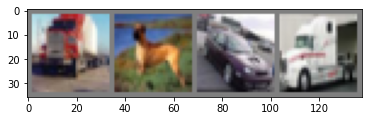

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    # [c, h, w]
    img = img / 2 + 0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0)) # [h, w, c]
    plt.imshow(nping)

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # 定义神经网络结构，输入数据 3 * 32 * 32
    def __init__(self):
        super(Net, self).__init__()
        # 卷积 3 * 3
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        
        x = x.view(-1, 16 * 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        
        return x

In [5]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):
    for i, data in enumerate(trainloader):
        images, labels = data
        outputs = net(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i % 1000 == 0):
            print('Epoch: %d, Step: %d, Loss: %.3f' %(epoch, i, loss.item()))

Epoch: 0, Step: 0, Loss: 2.338
Epoch: 0, Step: 1000, Loss: 1.985
Epoch: 0, Step: 2000, Loss: 2.437
Epoch: 0, Step: 3000, Loss: 2.113
Epoch: 0, Step: 4000, Loss: 3.054
Epoch: 0, Step: 5000, Loss: 0.873
Epoch: 0, Step: 6000, Loss: 1.162
Epoch: 0, Step: 7000, Loss: 1.708
Epoch: 0, Step: 8000, Loss: 0.969
Epoch: 0, Step: 9000, Loss: 1.872
Epoch: 0, Step: 10000, Loss: 0.848
Epoch: 0, Step: 11000, Loss: 0.947
Epoch: 0, Step: 12000, Loss: 0.975
Epoch: 1, Step: 0, Loss: 1.074
Epoch: 1, Step: 1000, Loss: 1.510
Epoch: 1, Step: 2000, Loss: 1.374
Epoch: 1, Step: 3000, Loss: 1.378
Epoch: 1, Step: 4000, Loss: 1.933
Epoch: 1, Step: 5000, Loss: 1.258
Epoch: 1, Step: 6000, Loss: 1.263
Epoch: 1, Step: 7000, Loss: 1.151
Epoch: 1, Step: 8000, Loss: 1.391
Epoch: 1, Step: 9000, Loss: 0.746
Epoch: 1, Step: 10000, Loss: 1.897
Epoch: 1, Step: 11000, Loss: 1.142
Epoch: 1, Step: 12000, Loss: 1.313


In [8]:
correct = 0.0
total = 0.0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        correct += (predicted == labels).sum()
        total += labels.size(0)

print('准确率：', float(correct) / total)

准确率： 0.6412


In [9]:
torch.save(net.state_dict(), 'C:\model.pt')